In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [28]:
fibonacci_complex <- function(n_lim = 5, n_iter = 10000, n_real = 11){
  phi <- (1+sqrt(5))/2
  num <- seq(0,n_lim,l = n_iter)
  fib <- (phi^num-((-1+0i)/phi)^num)/sqrt(5)
  real <- Re(fib)
  imag <- Im(fib)
  f <- numeric(n_real)
  f[1] <- 0
  f[2] <- 1
  if(any(num < 0)){
    for(i in 3:length(f)){
      f[i] <- f[i-1]+f[i-2]
    }
    for(i in 1:length(f)){
      f[i] <- f[i]*(-1)^i
    }
  }else{
    for(i in 3:length(f)){
      f[i] <- f[i-1]+f[i-2]
    }
  }
  data <- data.frame(Imag = imag, Real = real)
  lista <- list(fib_comp = data, fib = f)
  return(lista)
}

In [53]:
n_lim <- -10
n_iter <- 10000
n_real <- 20
fib <- fibonacci_complex(n_lim = n_lim, n_iter = n_iter, n_real = n_real)
f <- fib$fib

Warning message:
"Removed 9 rows containing missing values (geom_vline)."
Warning message:
"Removed 9 rows containing missing values (geom_point)."


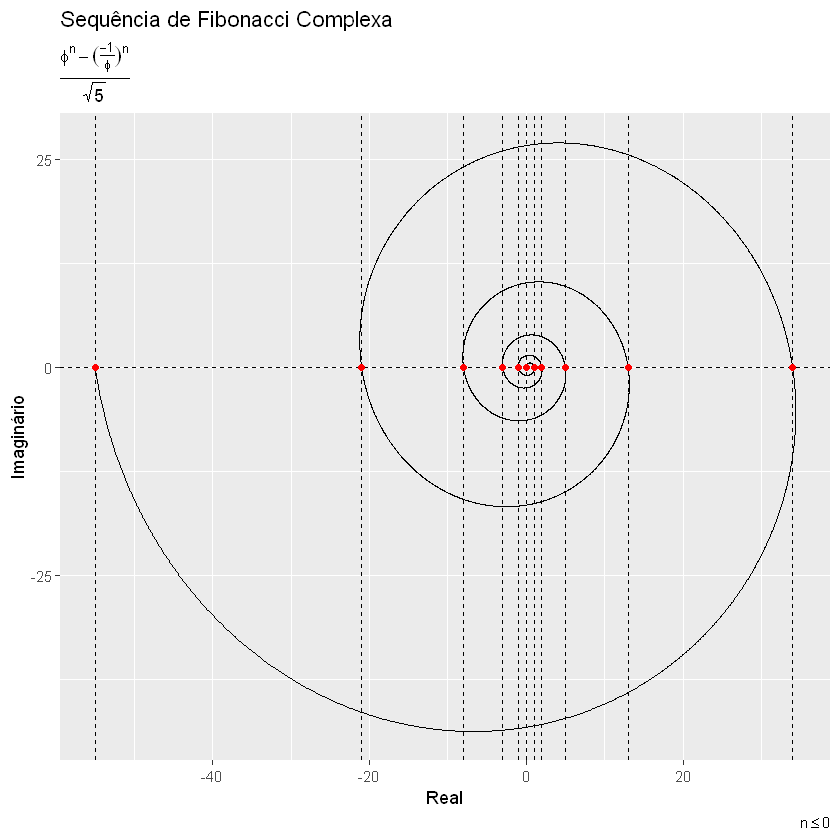

In [54]:
data <- fib$fib_comp
expressao <- expression(frac(phi^n-(frac(-1,phi))^n,sqrt(5)))
if(n_lim < 0){
  expre1 <- expression(n <= 0)
}else{
  expre1 <- expression(n >= 0)
}
fibo <- data.frame(f, z = 0)
ggplot()+
  geom_path(aes(x = Real, y = Imag),data = data)+
  geom_hline(yintercept = 0, lty = 2)+
  geom_vline(xintercept = f, lty = 2)+
  geom_point(aes(x = f, y = z), col = "red", data = fibo)+
  xlim(min(data$Real), max(data$Real))+
  labs(x = "Real", y = "Imaginário", caption = expre1)+
  ggtitle("Sequência de Fibonacci Complexa", subtitle = expressao)+
  scale_y_continuous(limits = c(min(data$Imag), max(data$Imag)))